# Hacktiv8 Phase 1: Graded Challenge 4

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Clustering.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Pada project kali ini dataset yang digunakan adalah data dari customers kartu kredit sebuah bank. Dataset ini berisi 8950 baris dengan 18 kolom yang di antaranya adalah kolom CUSTID, BALANCE, BALANCEFREQUENCY, PURCHASES, ONEOFFPURCHASES, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata).

Keterangan kolom pada dataset ini adalah:

| Feature                        | Description                                                                                                                 |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| CUSTID                         | Identification of Credit Card holder (Categorical)                                                                          |
| BALANCE                        | Balance amount left in their account to make purchases                                                                      |
| BALANCEFREQUENCY               | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)           |
| PURCHASES                      | Amount of purchases made from account                                                                                       |
| ONEOFFPURCHASES                | Maximum purchase amount done in one-go                                                                                      |
| INSTALLMENTSPURCHASES          | Amount of purchase done in installment                                                                                      |
| CASHADVANCE                    | Cash in advance given by the user                                                                                           |
| PURCHASESFREQUENCY             | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY       | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                   |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                      |
| CASHADVANCEFREQUENCY           | How frequently the cash in advance being paid                                                                               |
| CASHADVANCETRX                 | Number of Transactions made with "Cash in Advanced"                                                                         |
| PURCHASESTRX                   | Number of purchase transactions made                                                                                        |
| CREDITLIMIT                    | Limit of Credit Card for user                                                                                               |
| PAYMENTS                       | Amount of Payment done by user                                                                                              |
| MINIMUM_PAYMENTS               | Minimum amount of payments made by user                                                                                     |
| PRCFULLPAYMENT                 | Percent of full payment paid by user                                                                                        |
| TENURE                         | Tenure of credit card service for user                                                                                      |

### Objectives

**Graded Challenge 4** ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn.
- Mampu mempersiapkan data untuk digunakan dalam Clustering.
- Mampu mengimplementasikan Clustering pada data yang diberikan.

## Import Libraries

Menggunakan extension `patch_sklearn()` dari Intel® untuk mempercepat training model.

In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Pada project ini akan menggunakan library **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [3]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `cc` dari file `CCGENERAL.csv`.

In [4]:
cc = pd.read_csv('CCGENERAL.csv')

In [5]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Data Characteristics

In [6]:
cc.shape

(8950, 18)

Dataset ini berisi **8950 baris** dengan **18 kolom**.

In [7]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari basic info diatas dapat diketahui terdapat missing value pada kolom `MINIMUM_PAYMENTS` dan dataset ini terdiri dari:
- 14 kolom dengan tipe **float**
- 3 kolom dengan tipe **integer**
- 1 kolom dengan tipe **object**

In [8]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Jika dilihat dari summary statistic diatas, kebanyak dari kolom memiliki distribusi yang skewed dan terdapat banyak outlier karena nilai maksimum sangat berjauhan dengan quartile ketiganya. Hal ini akan dilihat lebih dalam pada bagian **EDA**.

## Data Cleaning

### Missing Value

Pada bagian ini akan dilakukan pengecekan terhadap missing value pada dataframe.

In [9]:
cc.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat **313 missing value** pada kolom `MINIMUM_PAYMENTS` dan **1 missing** value pada kolom `CREDIT_LIMIT`.

In [10]:
cc[cc.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [11]:
cc[cc.MINIMUM_PAYMENTS.isna()].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,313.0,555.441321,1292.687887,0.0,0.187069,16.848358,286.686616,9164.724752
BALANCE_FREQUENCY,313.0,0.389403,0.408341,0.0,0.090909,0.181818,1.000000,1.000000
PURCHASES,313.0,393.087284,757.905701,0.0,1.400000,130.400000,399.950000,7597.090000
ONEOFF_PURCHASES,313.0,250.433387,624.453991,0.0,0.000000,0.000000,176.030000,6761.290000
INSTALLMENTS_PURCHASES,313.0,142.653898,311.289043,0.0,0.000000,0.000000,152.280000,2959.240000
CASH_ADVANCE,313.0,559.136698,1185.132567,0.0,0.000000,0.000000,480.104401,7616.064965
PURCHASES_FREQUENCY,313.0,0.336043,0.372517,0.0,0.083333,0.166667,0.583333,1.000000
ONEOFF_PURCHASES_FREQUENCY,313.0,0.107886,0.227370,0.0,0.000000,0.000000,0.083333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,313.0,0.244670,0.359756,0.0,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,313.0,0.067169,0.130087,0.0,0.000000,0.000000,0.083333,1.000000


In [12]:
cc[cc.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


Jika dilihat dari summary statistic untuk data yang memiliki missing value pada kolom `MINIMUM_PAYMENTS`, sepertinya klien yang memiliki missing value ini adalah klien-klien yang jarang menggunakan kartu kredit mereka karena jika dilihat dari kolom `PURCHASES_TRX` rata-rata dari mereka hanya 6x saja menggunakan kartu kreditnya untuk bertransaksi.

Sedangkan untuk missing value pada kolom `CREDIT_LIMIT` hanya ditemukan 1 klien dan jika dilihat dari datanya, klien ini belum pernah menggunakan kartu kreditnya ini dapat dilihat dari kolom `PURCHASES` dan `PURCHASES_FREQUENCY`.

Maka untuk missing value pada kolom MINIMUM_PAYMENTS akan dilakukan **imputasi menggunakan median** sedangkan untuk missing value pada kolom `CREDIT_LIMIT` akan dihapus dari dataframe.

In [13]:
cc = cc.dropna(subset=['CREDIT_LIMIT'])
cc.MINIMUM_PAYMENTS.fillna(cc.MINIMUM_PAYMENTS.median(), inplace=True)

In [14]:
cc.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sekarang sudah tidak lagi terdapat missing value pada dataframe.

### Duplicated Data

Pada bagian ini akan dilakukan pengecekan terhadap data duplikat pada dataframe.

In [15]:
cc.duplicated().sum()

0

Tidak ditemukan data duplikat pada dataframe.

### Drop Column

In [16]:
print(f'Number of unique values in CUST_ID: {cc.CUST_ID.nunique()}')

Number of unique values in CUST_ID: 8949


Terdapat 8949 unique value pada kolom `CUST_ID` ini yang mana kolom ini adalah id dari setiap customer dan tidak akan digunakan, maka kolom ini akan dihapus dari dataframe.

In [17]:
cc = cc.drop(columns=['CUST_ID'])

In [18]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

Sekarang kolom `CUST_ID` sudah tidak lagi ada pada dataframe.

## Exploratory Data Analysis (EDA)

### Balance

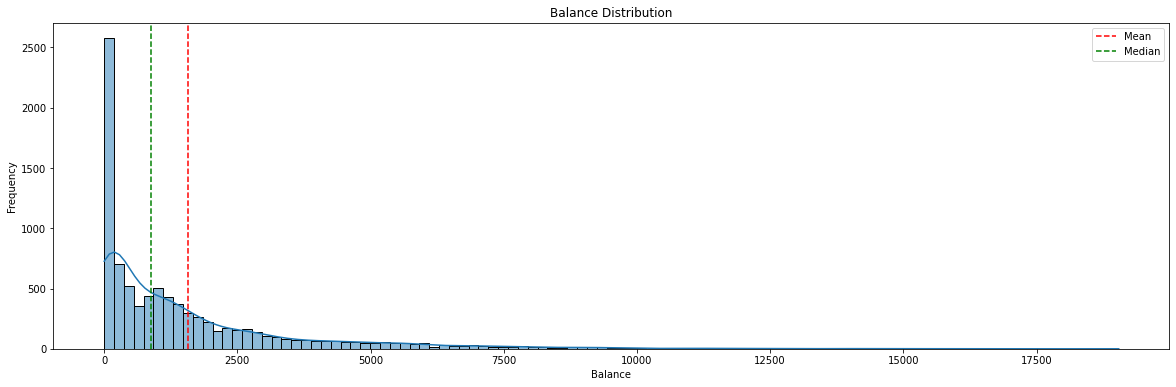

Skewness: 2.393270481328754
Mean: 1564.6475927195218
Median: 873.680279


In [19]:
plt.figure(figsize=(20, 6))
sns.histplot(x='BALANCE', data=cc, kde=True)
plt.axvline(x=cc.BALANCE.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=cc.BALANCE.median(), color='green', linestyle='--', label='Median')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {cc.BALANCE.skew()}')
print(f'Mean: {cc.BALANCE.mean()}')
print(f'Median: {cc.BALANCE.median()}')

Rata-rata dari klien memiliki saldo sekitar **$1,565**, namun ada juga klien yang memiliki saldo sebih dari **$7,500** bahkan ada juga yang lebih dari **$17,500**. Dan jika dilihat dari distribusinya kolom ini **Highly-Skewed** dengan nilai skewness 2.4, terdapat outlier pada kolom `BALANCE` ini.

In [20]:
cc[cc.BALANCE > 17500]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
138,19043.13856,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.750000,1.0,0.0,0,216,18000.0,23018.575830,18621.01331,0.0,12
4140,18495.55855,1.0,5288.28,3657.30,1630.98,0.0,1.0,0.583333,1.0,0.0,0,76,22000.0,4246.168346,4227.08158,0.0,12


Dan ternyata ada **2 klien** yang memiliki saldo lebih dari $17,500 ini mereka sangat sering melakukan pembelian menggunakan kartu kredit ini dapat dilihat dari kolom `PURCHASES_FREQUENCY` dimana keduanya mendapat score 1.  

### PAYMENTS

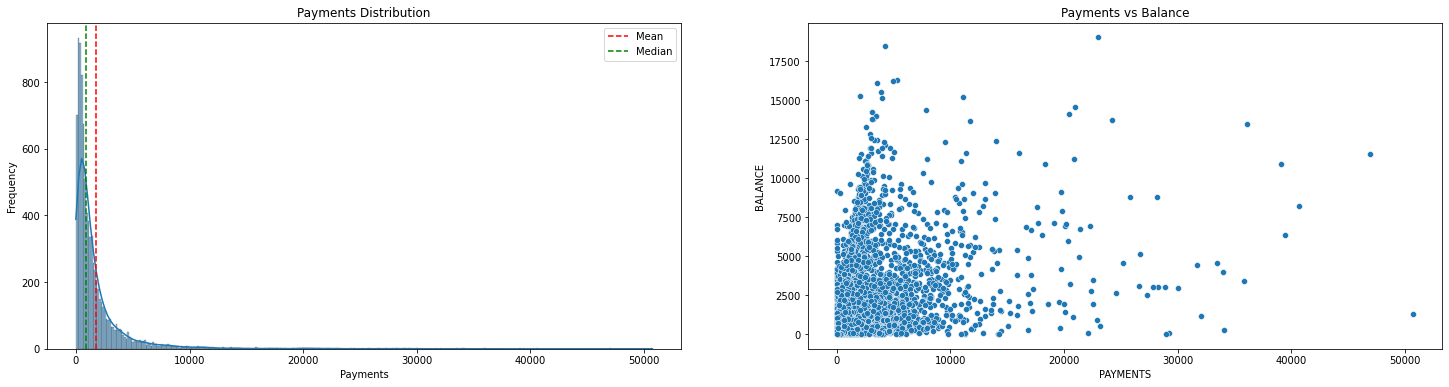

Skewness: 5.90746501386916
Mean: 1733.3365108509329
Median: 857.062706


In [21]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='PAYMENTS', data=cc, kde=True)
plt.axvline(x=cc.PAYMENTS.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=cc.PAYMENTS.median(), color='green', linestyle='--', label='Median')
plt.title('Payments Distribution')
plt.xlabel('Payments')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.scatterplot(x='PAYMENTS', y='BALANCE', data=cc)
plt.title('Payments vs Balance')
plt.show()
print(f'Skewness: {cc.PAYMENTS.skew()}')
print(f'Mean: {cc.PAYMENTS.mean()}')
print(f'Median: {cc.PAYMENTS.median()}')

Untuk kolom `PAYMENTS` ini memiliki distribusi yang juga **Highly-Skewed** dengan nilai skewness **6**. Rata-rata jumlah pembayaran yang dilakukan oleh klien dengan kartu kredit ini sebesar **$1,733**, namun ada juga klien yang melakukan pembayaran menggunakan kartu kredit lebih dari **$50,000** dan jika dilihat dari scatter plot kolom `PAYMENTS` ini memiliki hubungan positive dengan kolom `BALANCE` walaupun hubungan ini tergolong lemah, dimana semakin besar saldo yang dimiliki oleh klien jumlah pembayarannya pun akan semakin besar.

### TENURE

In [22]:
print(f'Tenure number of unique values: {cc.TENURE.nunique()}')
print(f'Tenure unique values: {cc.TENURE.unique()}')

Tenure number of unique values: 7
Tenure unique values: [12  8 11  9 10  7  6]


Pada kolom `TENURE` ini ada **7 unique** values yang diantaranya adalah **6**, **7**, **8**, **9**, **10**, **11**, dan **12**.

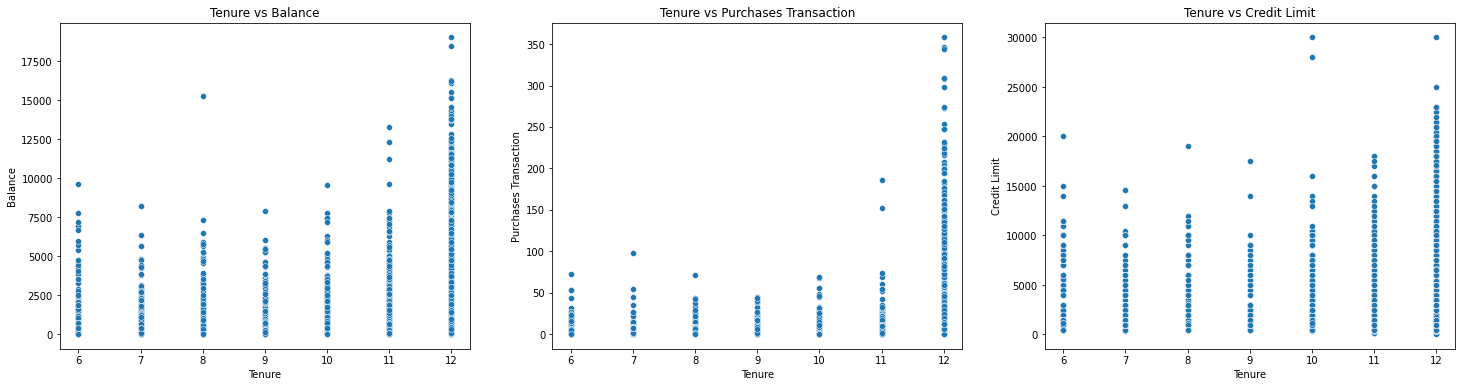

In [23]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TENURE', y='BALANCE', data=cc)
plt.title('Tenure vs Balance')
plt.xlabel('Tenure')
plt.ylabel('Balance')
plt.subplot(1, 3, 2)
sns.scatterplot(x='TENURE', y='PURCHASES_TRX', data=cc)
plt.title('Tenure vs Purchases Transaction')
plt.xlabel('Tenure')
plt.ylabel('Purchases Transaction')
plt.subplot(1, 3, 3)
sns.scatterplot(x='TENURE', y='CREDIT_LIMIT', data=cc)
plt.title('Tenure vs Credit Limit')
plt.xlabel('Tenure')
plt.ylabel('Credit Limit')
plt.show()

Ternyata kolom `TENURE` atau jangka waktu layanan kartu kredit ini memiliki hubungan yang positive dengan kolom `BALANCE`, `PURCHASES_TRANSACTION`, dan `CREDIT_LIMIT`. Yang mana hal ini mengartikan bahwa klien yang memiliki jangka waktu yang panjang cenderung memiliki saldo yang lebih banyak yang menyebabkan klien-klien ini lebih sering melakukan transaksi dibandingkan dengan klien yang memiliki jangka waktu yang pendek, dan lamanya jangka waktu layanan juga sepertinya mempengaruhi limit dari kartu kredit klien jadi semakin panjang jangka waktu layanannya maka limit dari kartu kredit klien juga akan semakin besar.

### CREDITLIMIT

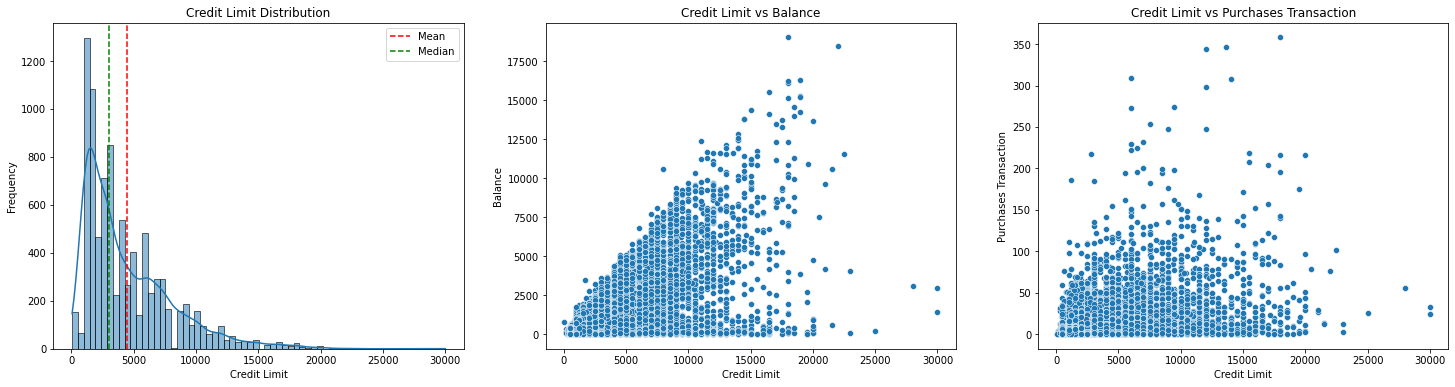

Skewness: 1.5224640052886198
Mean: 4494.449450364621
Median: 3000.0


In [24]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(x='CREDIT_LIMIT', data=cc, kde=True)
plt.axvline(x=cc.CREDIT_LIMIT.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=cc.CREDIT_LIMIT.median(), color='green', linestyle='--', label='Median')
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 2)
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=cc)
plt.title('Credit Limit vs Balance')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.subplot(1, 3, 3)
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES_TRX', data=cc)
plt.title('Credit Limit vs Purchases Transaction')
plt.xlabel('Credit Limit')
plt.ylabel('Purchases Transaction')
plt.show()
print(f'Skewness: {cc.CREDIT_LIMIT.skew()}')
print(f'Mean: {cc.CREDIT_LIMIT.mean()}')
print(f'Median: {cc.CREDIT_LIMIT.median()}')

Rata-rata dari klien memiliki limit dari kartu kreditnya sekitar **$4,500** dan semakin besar saldo yang dimiliki oleh klien limit dari kartu kredit mereka juga akan semakin besar. Namun, nampaknya limit dari kartu kredit ini tidak terlalu mempengaruhi jumlah transaksi dari klien.

### PRCFULLPAYMENT

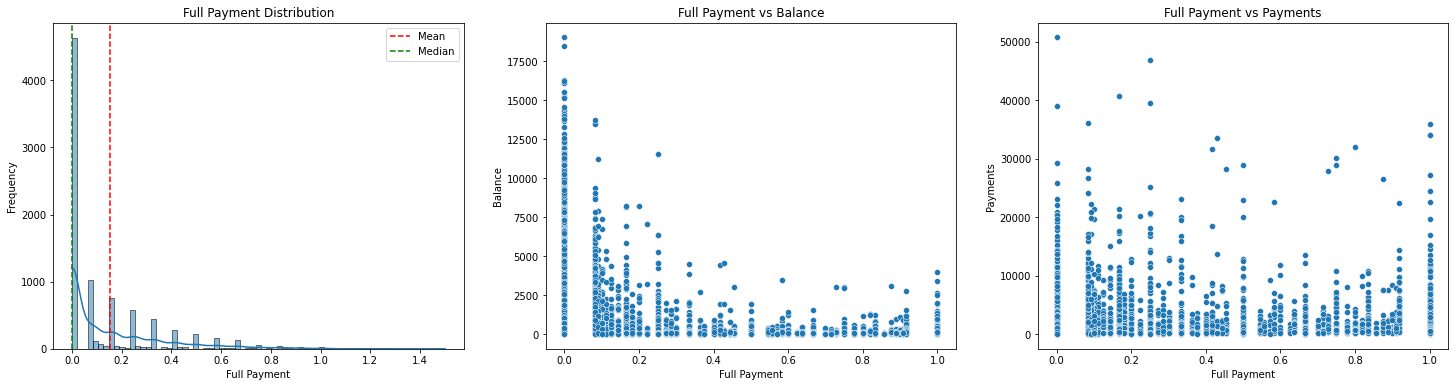

Skewness: 1.9426413977925
Mean: 0.15373182523186948
Median: 0.0


In [25]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.histplot(x='CASH_ADVANCE_FREQUENCY', data=cc, kde=True)
plt.axvline(x=cc.PRC_FULL_PAYMENT.mean(), color='red', linestyle='--', label='Mean')
plt.axvline(x=cc.PRC_FULL_PAYMENT.median(), color='green', linestyle='--', label='Median')
plt.title('Full Payment Distribution')
plt.xlabel('Full Payment')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 2)
sns.scatterplot(x='PRC_FULL_PAYMENT', y='BALANCE', data=cc)
plt.title('Full Payment vs Balance')
plt.xlabel('Full Payment')
plt.ylabel('Balance')
plt.subplot(1, 3, 3)
sns.scatterplot(x='PRC_FULL_PAYMENT', y='PAYMENTS', data=cc)
plt.title('Full Payment vs Payments')
plt.xlabel('Full Payment')
plt.ylabel('Payments')
plt.show()
print(f'Skewness: {cc.PRC_FULL_PAYMENT.skew()}')
print(f'Mean: {cc.PRC_FULL_PAYMENT.mean()}')
print(f'Median: {cc.PRC_FULL_PAYMENT.median()}')

Kebanyakan dari klien membayar barang yang mereka beli dengan uang cash hanya sekitar **15%** saja 85% sisanya dilakukan dengan menggunakan kartu kredit. Dan ternyata kolom `PRC_FULL_PAYMENT` memiliki hubungan yang negative dengan kolom `BALANCE` jadi klien yang lebih sering menggunakan uang cash untuk membeli barang saldo kartu kredit mereka cenderung kecil.

### Distribution Plot

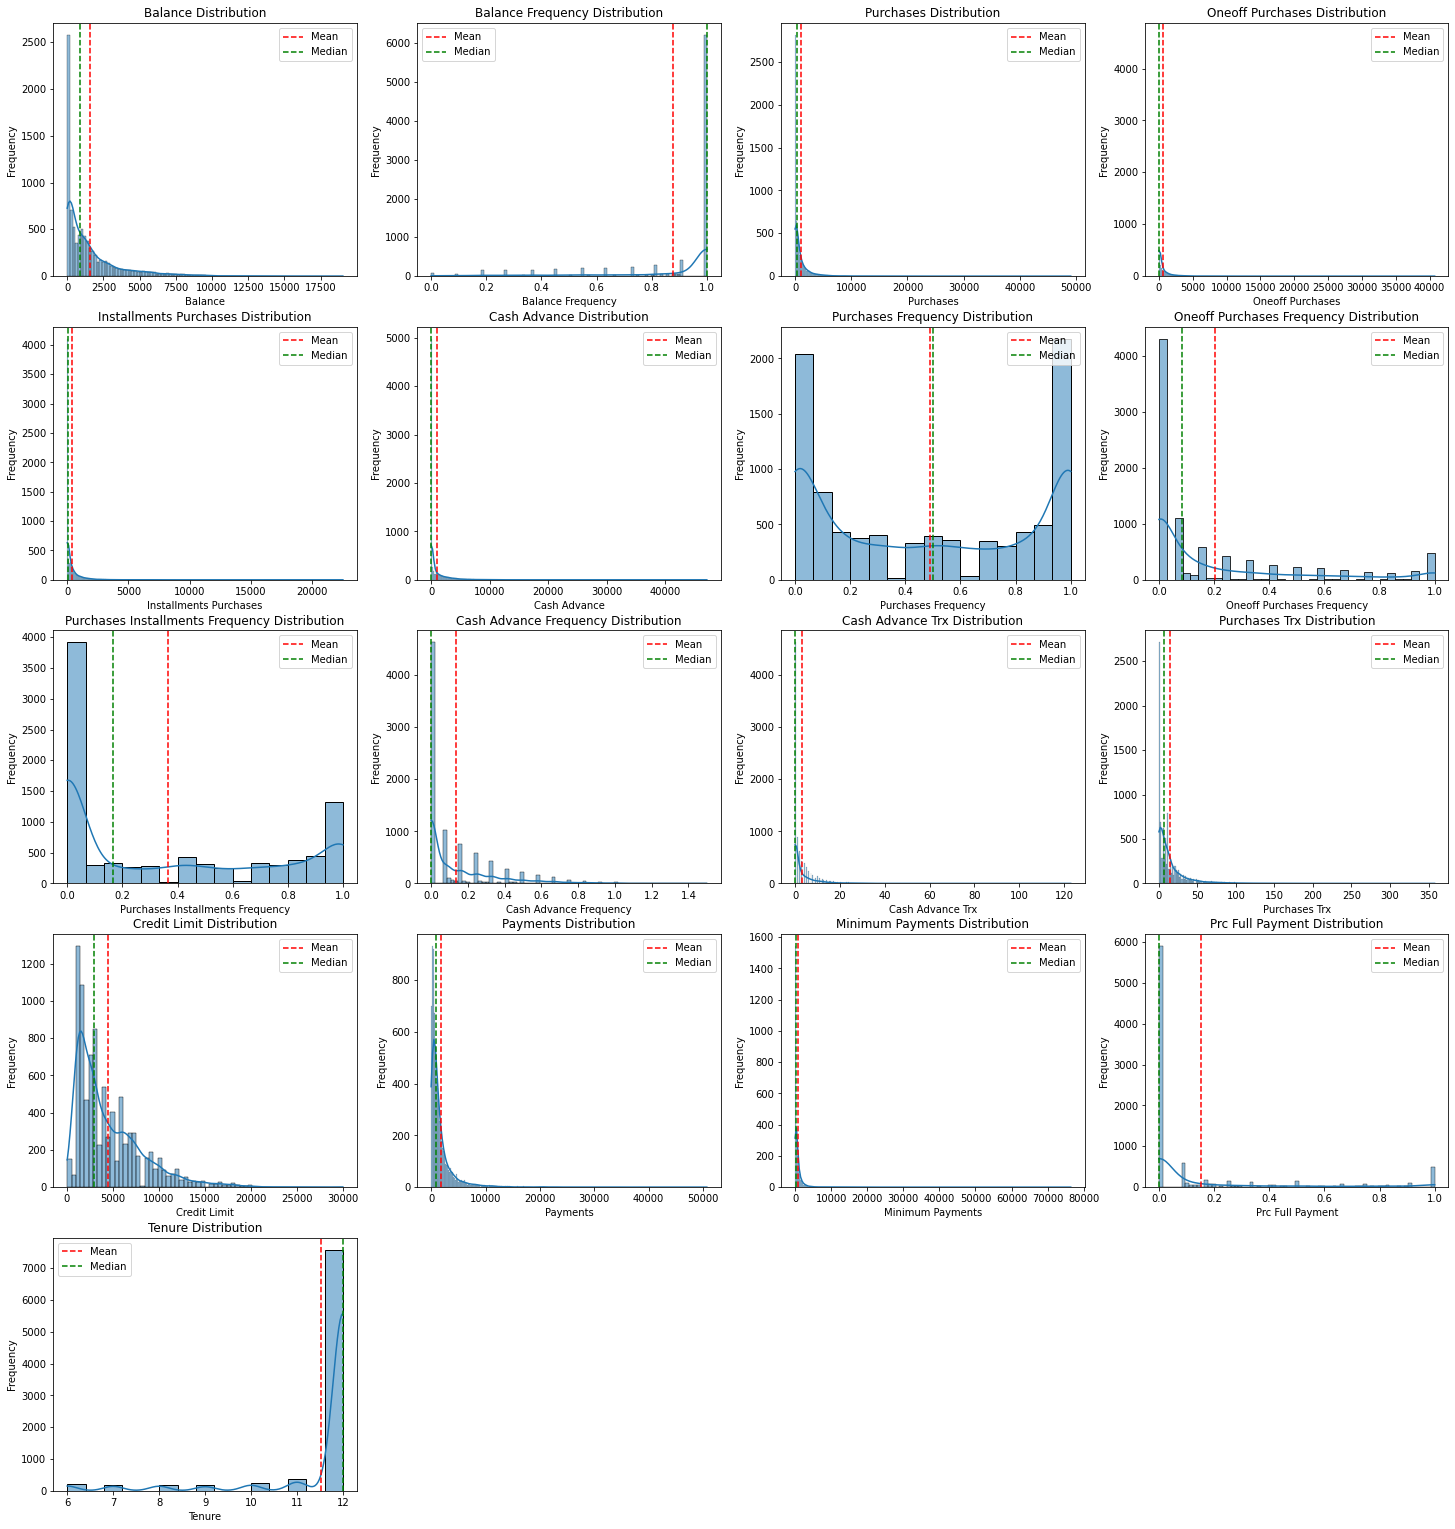

In [26]:
plt.figure(figsize=(25, 27))
for col in cc.columns:
    plt.subplot(5, 4, cc.columns.get_loc(col) + 1)
    sns.histplot(x=col, data=cc, kde=True)
    plt.axvline(x=cc[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=cc[col].median(), color='green', linestyle='--', label='Median')
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

Hampir seluruh kolom pada dataset memiliki outlier dan berdistribusi **Skewed** kecuali kolom `PURCHASES_FREQUENCY` nampaknya kolom ini tidak memiliki outlier dan berdistribusi normal.

### Correlation Matrix

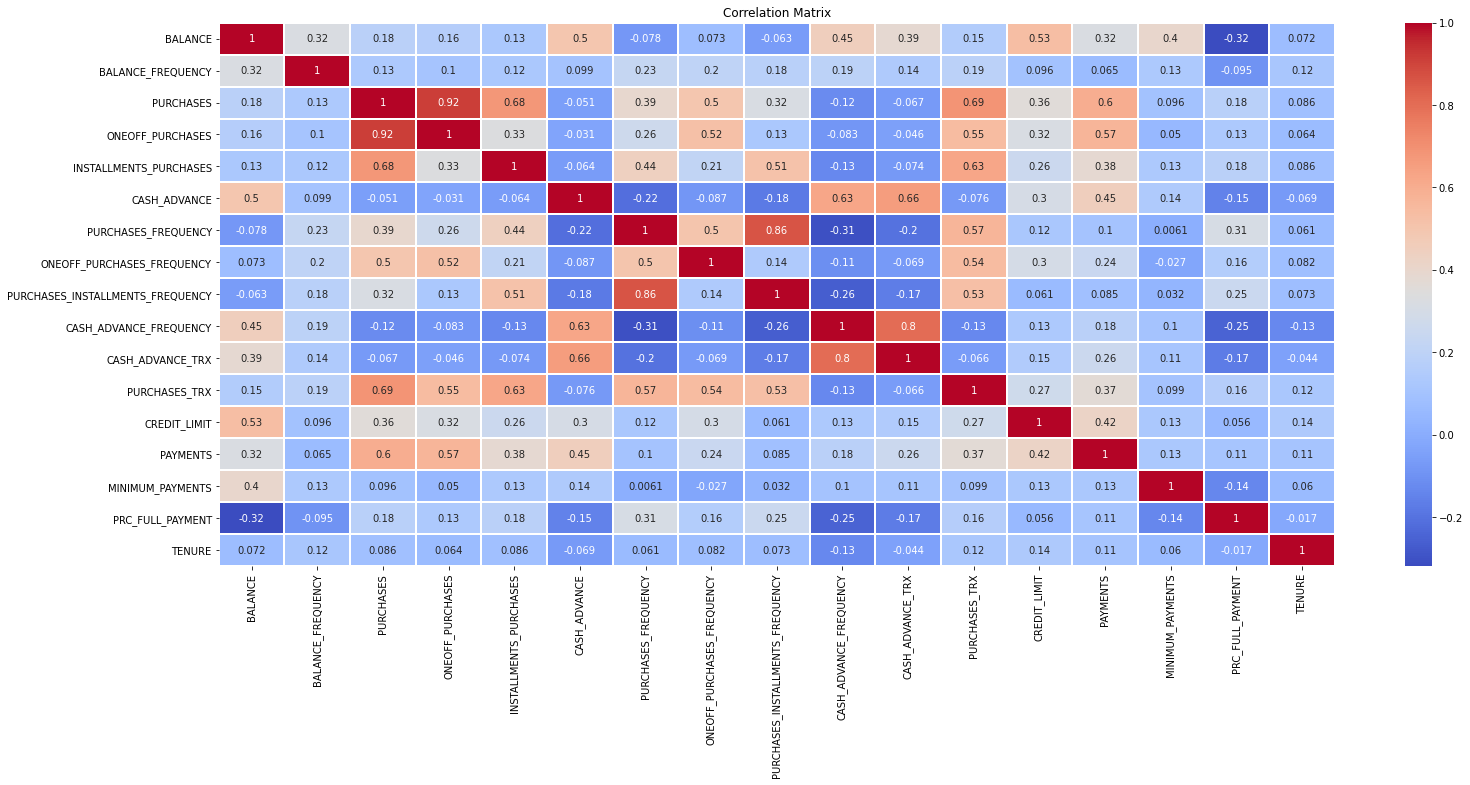

In [27]:
plt.figure(figsize=(25, 10))
sns.heatmap(cc.corr(), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

Jika dilihat dari correlation matrix diatas ada kolom-kolom yang saling berhubungan dengan satu sama lain, namun ada juga kolom yang tidak memiliki hubungan dengan kolom lainnya. Maka akan dilakukan dimensionality reduction menggunakan PCA pada bagian **data preprocessing**.

## Data Preprocessing

### Split Data

Pada bagian ini akan dipisahkan antara data training dan testing dengan perbandingan **9.5:0.5**, dimana:
- **95%** data menjadi **training set**
- **5%** data menjadi **testing set**

In [28]:
train, test = train_test_split(cc, test_size=0.05, random_state=23)

In [29]:
print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (8501, 17)
Test size: (448, 17)


### Outlier Handling

Pada bagian ini akan dilakukan handling pada untuk outlier, dimana:
- jika **outlier < 5%** maka akan **dihapus**
- jika **outlier >= 5% dan outlier < 15%** maka akan dilakukan **capping**
- jika **outlier >= 15%** maka akan **dibiarkan**

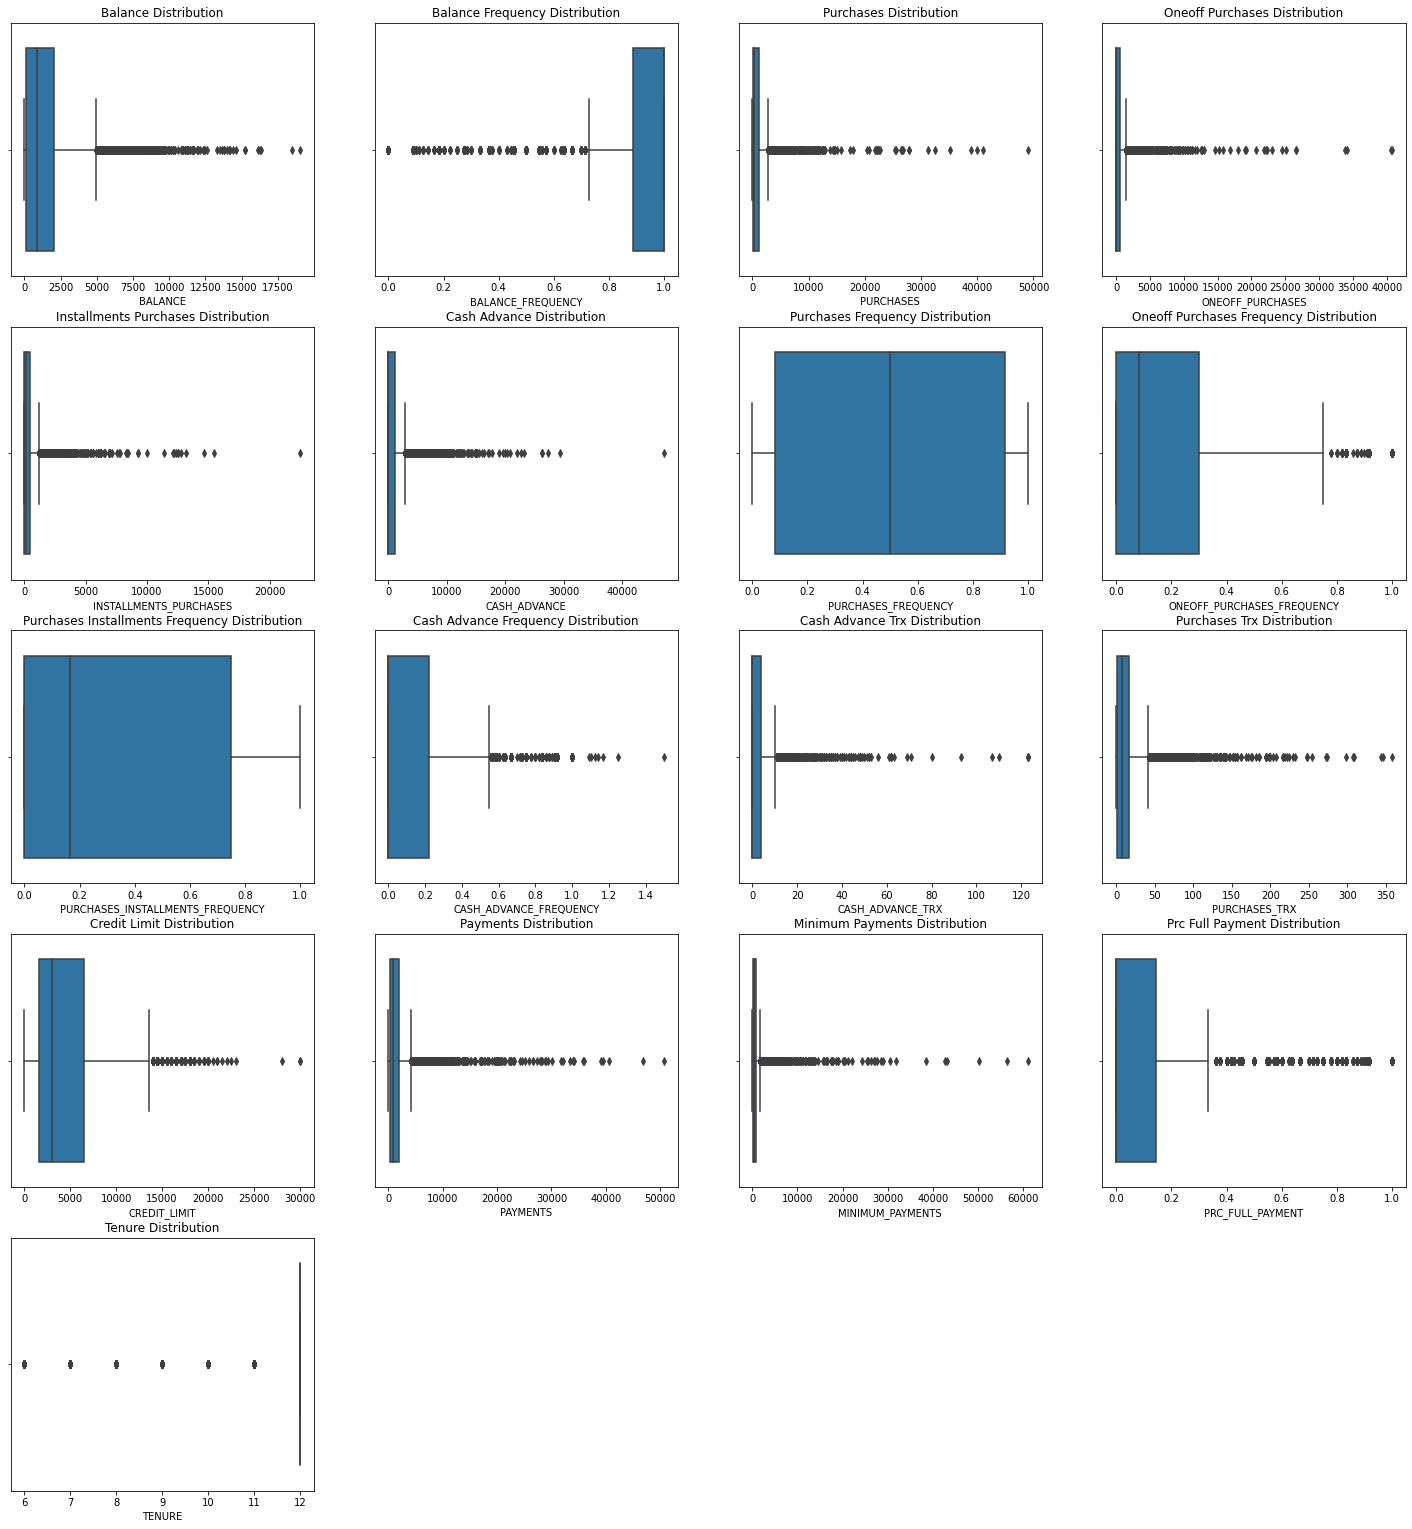

In [30]:
plt.figure(figsize=(25, 27))
for col in train.columns:
    plt.subplot(5, 4, cc.columns.get_loc(col) + 1)
    sns.boxplot(x=col, data=train)
    plt.title(f"{col.replace('_', ' ').title()} Distribution")
plt.show()

Dapat dilihat dari box plot diatas, hampir dari seluruh kolom pada dataframe ini memiliki outlier oleh karena itu akan dilakukan perhitungan untuk menghitung persentase outlier pada kolom `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, `INSTALLMENTS_PURCHASES`, `CASH_ADVANCE`, `CASH_ADVANCE_TRX`, `PURCHASES_TRX`, `CREDIT_LIMIT`, `PAYMENTS`, `MINIMUM_PAYMENTS`, dan `PRC_FULL_PAYMENT`. Karena kolom-kolom tersebut memiliki distribusi yang skewed maka akan dihitung menggunakan IQR.

In [31]:
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [32]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
outlier_precentage = pd.DataFrame(columns=['Column', 'Outlier Precentage'])
for i in range(len(cols)):
    outlier_precentage.loc[i] = [cols[i], round(upper_lower(train, cols[i]).shape[0] / train.shape[0] * 100, 2)]
outlier_precentage

,Column,Outlier Precentage
0,BALANCE,92.35
1,PURCHASES,90.88
2,ONEOFF_PURCHASES,88.67
3,INSTALLMENTS_PURCHASES,90.17
4,CASH_ADVANCE,88.54
5,CASH_ADVANCE_TRX,89.37
6,PURCHASES_TRX,91.01
7,CREDIT_LIMIT,97.33
8,PAYMENTS,90.94
9,MINIMUM_PAYMENTS,89.92


Dari hasil perhitungan diatas, ternyata outlier pada kolom-kolom tersebut sangat banyak. Maka, outlier akan dibiarkan.

### Data Scaling

Karena clustering ini berhubungan dengan perhitungan jarak antar data, maka pada bagian ini akan dilakukan **scaling** data menggunakan `StandardScaler()`

In [33]:
scaler = StandardScaler()

Melakukan **scaling** terhadap data `train` dan `test`.

In [34]:
train = scaler.fit_transform(train)
test = scaler.transform(test)

# Convert to dataframe
train = pd.DataFrame(train, columns=cc.columns)
test = pd.DataFrame(test, columns=cc.columns)

Bentuk dari data `train` setelah dilakukan **scaling**.

In [35]:
train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.541331,-1.411006,-0.467192,-0.355558,-0.454017,0.057393,-1.224015,-0.679906,-0.917960,0.159380,-0.035865,-0.589233,-0.965235,-0.529731,-0.269076,-0.525013,0.359816
1,0.109153,0.516696,-0.467192,-0.355558,-0.454017,-0.402962,-1.224015,-0.679906,-0.917960,0.159380,0.110155,-0.589233,-0.743871,-0.496815,3.832065,-0.525013,0.359816
2,-0.008501,0.516696,-0.393147,-0.260249,-0.454017,0.936350,-1.016382,-0.401155,-0.917960,0.577324,0.110155,-0.549480,-0.411825,-0.358363,-0.203083,-0.525013,0.359816
3,-0.738268,0.516696,-0.282709,-0.355558,-0.015731,-0.464273,1.267595,-0.679906,1.596091,-0.676514,-0.473924,-0.112194,-0.550178,-0.448334,-0.295231,2.902731,0.359816
4,3.458411,0.516696,-0.467192,-0.355558,-0.454017,0.849183,-1.224015,-0.679906,-0.917960,-0.258569,-0.181885,-0.589233,3.600397,0.209517,0.789832,-0.525013,0.359816


Bentuk dari data `test` setelah dilakukan **scaling**.

In [36]:
test.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.741398,0.516696,-0.317987,-0.355558,-0.099542,-0.464273,1.059962,-0.679906,1.177082,-0.676514,-0.473924,-0.151947,-0.826883,-0.504027,-0.303080,1.874408,0.359816
1,-0.725891,0.516696,-0.214801,-0.355558,0.145603,-0.464273,1.059962,-0.679906,1.177082,-0.676514,-0.473924,-0.151947,-0.135120,-0.417108,-0.308674,0.046279,0.359816
2,-0.461883,0.516696,-0.371933,-0.232943,-0.454017,0.045692,-0.601112,0.156353,-0.917960,0.577324,-0.035865,-0.469973,0.418290,-0.506779,-0.287681,-0.525013,0.359816
3,1.804662,0.516696,-0.373567,-0.286405,-0.359222,0.276773,-0.393479,-0.122399,-0.498951,2.667056,2.008410,-0.390467,1.386757,-0.121776,0.194433,-0.525013,0.359816
4,2.288060,0.516696,-0.467192,-0.355558,-0.454017,1.139458,-1.224015,-0.679906,-0.917960,0.577324,0.840253,-0.589233,1.663462,0.014092,0.384193,-0.525013,0.359816


### Principal Component Analysis (PCA)

Pada bagian ini akan dilakukan reduksi dimensi menggunakan **PCA**.

In [37]:
pca = PCA(n_components=17)
pca.fit(train)

PCA(n_components=17)

Menghitung cumulative explained variance ratio dari component.

In [38]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

Melakukan plotting untuk melihat explained variance ratio.

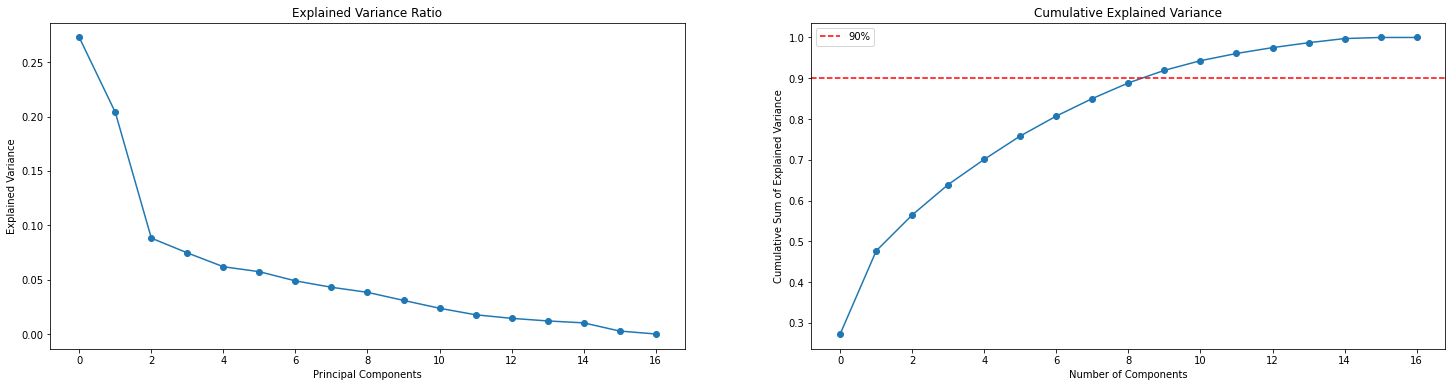

In [39]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.subplot(1, 2, 2)
cev = plt.plot(cumsum, marker='o')
plt.axhline(y=0.9, color='red', linestyle='--', label='90%')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.legend()
plt.show()

Jika dilihat dari grafik Cumulative Explained Variance Ratio didapatkan bahwa dengan hanya menggunakan 9 components dapat mempertahankan 90% informasi dari data. Maka, data train akan direduksi menjadi **9 dimensi** yang mulanya 17 dimensi.

In [40]:
print(f'Number of components: {np.argmax(cumsum >= 0.9)}')
print(f'Explained variance: {cumsum[np.argmax(cumsum >= 0.9)]}')

Number of components: 9
Explained variance: 0.9194012311018114


In [41]:
pca_9d = PCA(n_components=9)

In [42]:
train = pca_9d.fit_transform(train)
test = pca_9d.transform(test)

# Convert to dataframe
train = pd.DataFrame(train, columns=['PCA_' + str(i) for i in range(1, 10)])
test = pd.DataFrame(test, columns=['PCA_' + str(i) for i in range(1, 10)])

Bentuk dari data `train` setelah dilakukan **reduksi dimensi**.

In [43]:
train.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-2.184135,-0.245106,-1.045806,0.199094,-0.477004,-0.044474,-0.847904,-0.157295,-0.707134
1,-1.570340,0.921451,0.811260,2.374713,-1.124835,-1.312110,0.096849,2.543986,-0.514588
2,-1.566450,1.000633,-0.157214,0.320797,0.456410,0.250120,-0.572820,0.141733,0.369873
3,0.587404,-2.321263,1.226113,-1.539075,-0.653013,1.311622,0.489671,1.441206,0.899348
4,-0.281596,3.190342,-0.036321,2.472088,-1.031469,1.005541,2.701268,-1.457265,1.488473


Bentuk dari data `test` setelah dilakukan **reduksi dimensi**.

In [44]:
test.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,0.137833,-2.092159,1.123484,-1.000236,-0.351844,0.874653,0.030205,1.060396,0.655500
1,0.193905,-1.554312,1.267781,-0.164495,-0.241302,0.418796,-0.279329,-0.239329,0.372678
2,-1.108854,0.419294,-0.240021,0.508510,0.881738,0.442009,-0.038914,-0.142281,0.216339
3,-0.678795,3.494640,0.819232,-0.041821,0.598427,0.602537,0.299286,-0.425208,-0.101622
4,-1.019257,3.052573,0.129904,1.131501,-0.362807,0.687722,0.983888,-0.629973,0.806177


## Modeling

Pada bagian ini akan dibuat **3 model** dan akan dievaluasi untuk melakukan clustering, yaitu:
- K-Means Clustering
- Agglomerative Clustering
- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

### K-Means Clustering

In [45]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia = [KMeans(n_clusters=k, random_state=23).fit(train).inertia_ for k in K]

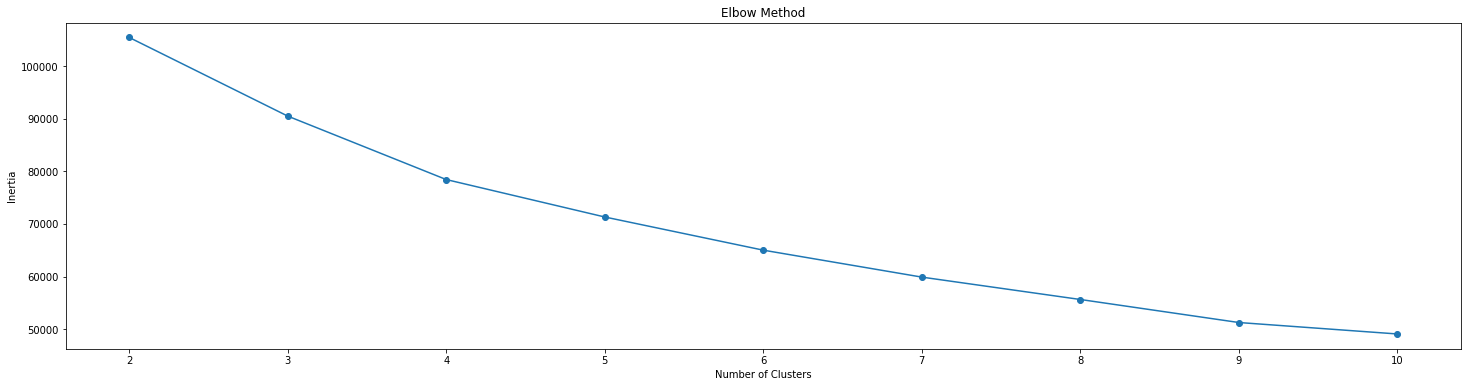

In [46]:
plt.figure(figsize=(25, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Jika dilihat dari grafik elbow diatas, nampaknya jumlah cluster **3**, **4**, dan **5** menjadi kandidat yang baik. Namun, akan dilihat hasil dari **Silhouette Score** dari masing-masing jumlah cluster.

In [47]:
kmeans_score = pd.DataFrame(columns=['K', 'Silhouette Score'])

In [48]:
for i in range(2, 11):
    kmeans_score.loc[i-2] = [i, round(silhouette_score(train, KMeans(n_clusters=i, random_state=23).fit(train).labels_), 3)]

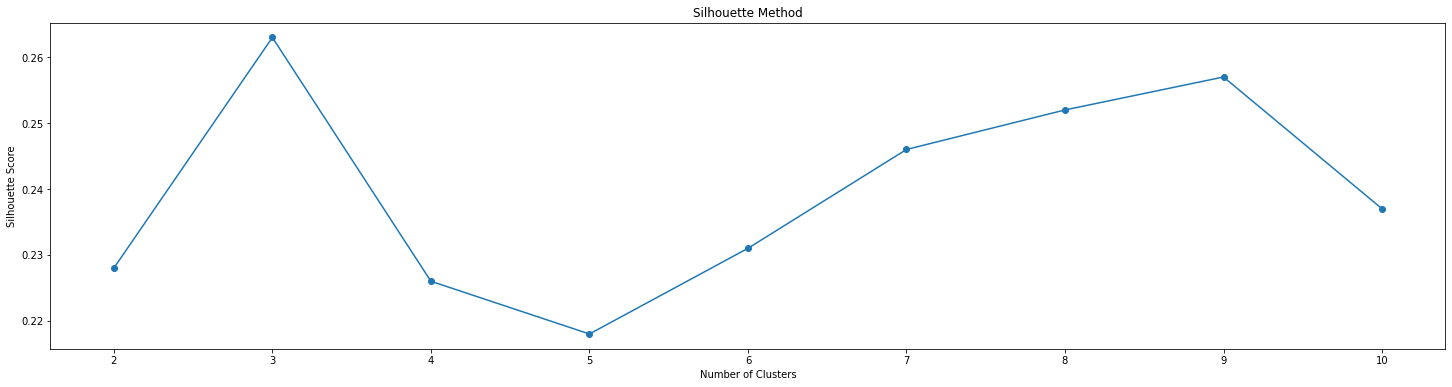

In [49]:
plt.figure(figsize=(25, 6))
plt.plot(kmeans_score['K'], kmeans_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [50]:
kmeans_score.sort_values(by='Silhouette Score', ascending=False)

,K,Silhouette Score
1,3.0,0.263
7,9.0,0.257
6,8.0,0.252
5,7.0,0.246
8,10.0,0.237
4,6.0,0.231
0,2.0,0.228
2,4.0,0.226
3,5.0,0.218


Dari hasil perhitungan Silhouetter Score didapatkan model K-Means dengan menggunakan jumlah cluster 3 memiliki silhouette score paling tinggi yaitu **0.263**. Maka, akan dibuat model `kmeans` dengan menggunakan **n_cluster = 3**.

In [51]:
kmeans = KMeans(n_clusters=3, random_state=23)
kmeans.fit(train)

KMeans(n_clusters=3, random_state=23)

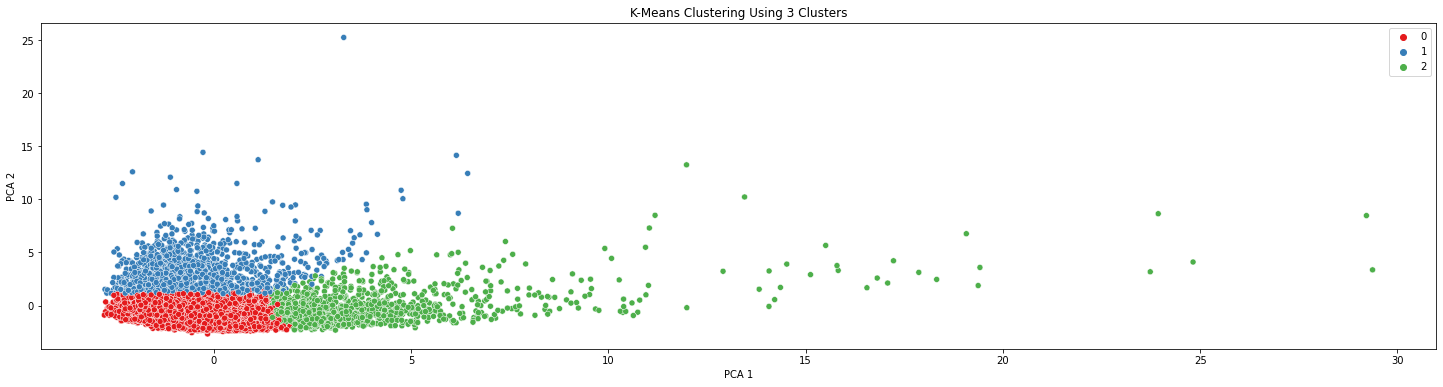

In [52]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=kmeans.labels_, data=train, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Agglomerative Clustering

Membuat dataframe untuk menyimpan silhouette score dari setiap jumlah cluster untuk agglomerative clustering.

In [53]:
agglomerative_score = pd.DataFrame(columns=['n_clusters', 'Silhouette Score'])
for i in range(2, 11):
    agglomerative_score.loc[i-2] = [i, round(silhouette_score(train, AgglomerativeClustering(n_clusters=i, linkage='ward').fit(train).labels_), 3)]

Melakukan plotting terhadap silhouette score.

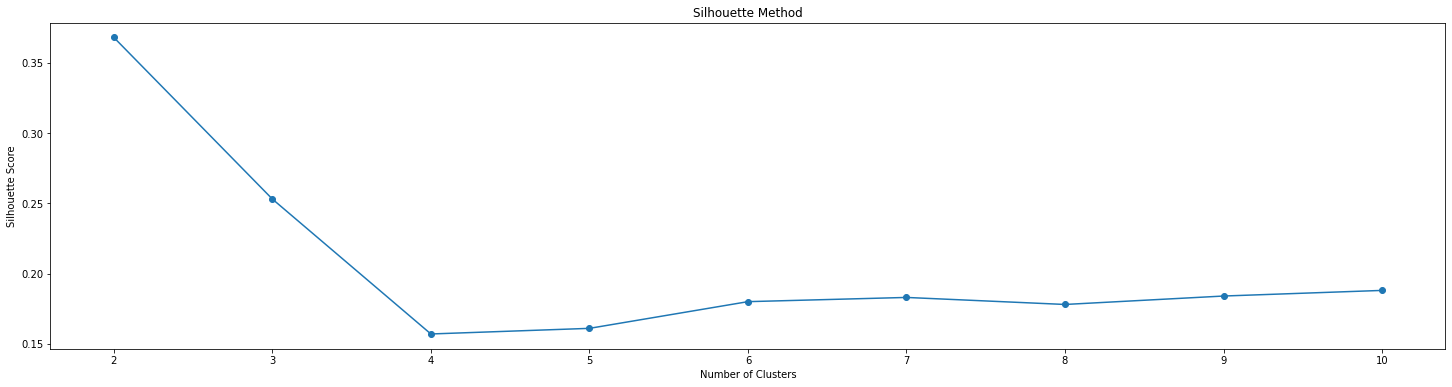

In [54]:
plt.figure(figsize=(25, 6))
plt.plot(agglomerative_score['n_clusters'], agglomerative_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [55]:
agglomerative_score.sort_values(by='Silhouette Score', ascending=False)

,n_clusters,Silhouette Score
0,2.0,0.368
1,3.0,0.253
8,10.0,0.188
7,9.0,0.184
5,7.0,0.183
4,6.0,0.180
6,8.0,0.178
3,5.0,0.161
2,4.0,0.157


Jika dilihat dari score silhouettenya, algoritma Agglomerative ini memiliki score paling tinggi pada jumlah cluster 2 yaitu **0.368**. Maka, akan dibuat model agglomerative clustering dengan **n_cluster = 2**.

In [56]:
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglomerative.fit(train)

AgglomerativeClustering()

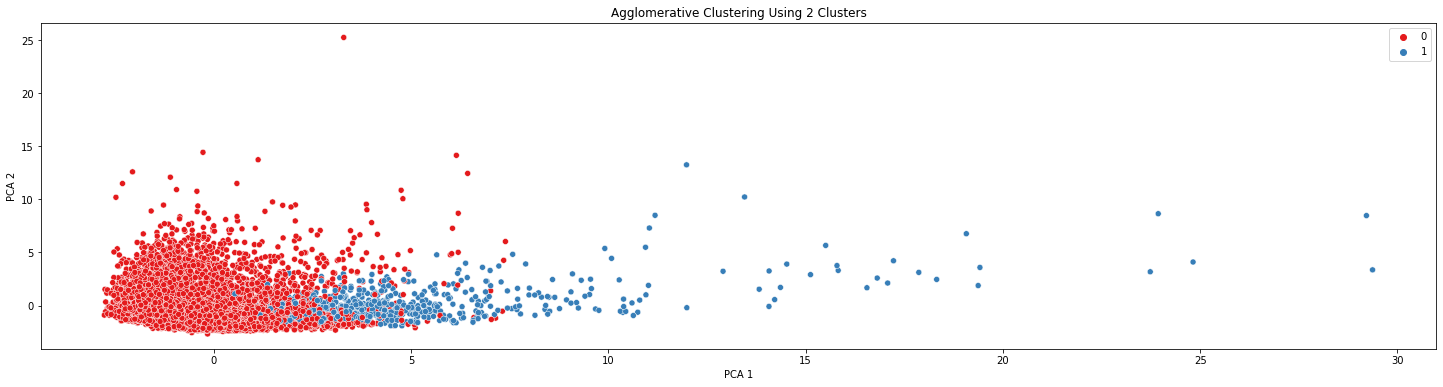

In [57]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=agglomerative.labels_, data=train, palette='Set1')
plt.title('Agglomerative Clustering Using 2 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

Membuat dataframe yang akan menampung score silhouette dari tiap epsilon yang digunakan pada DBSCAN, ada **10 epsilon** yang digunakan untuk pengujian mulai dari **0.1 hingga 1.0**.

In [58]:
dbscan_score = pd.DataFrame(columns=['eps', 'Silhouette Score'])
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for i in range(len(epsilons)):
    dbscan_score.loc[i] = [epsilons[i], round(silhouette_score(train, DBSCAN(eps=epsilons[i]).fit(train).labels_), 3)]

Melakukan plotting untuk score silhouette DBSCAN.

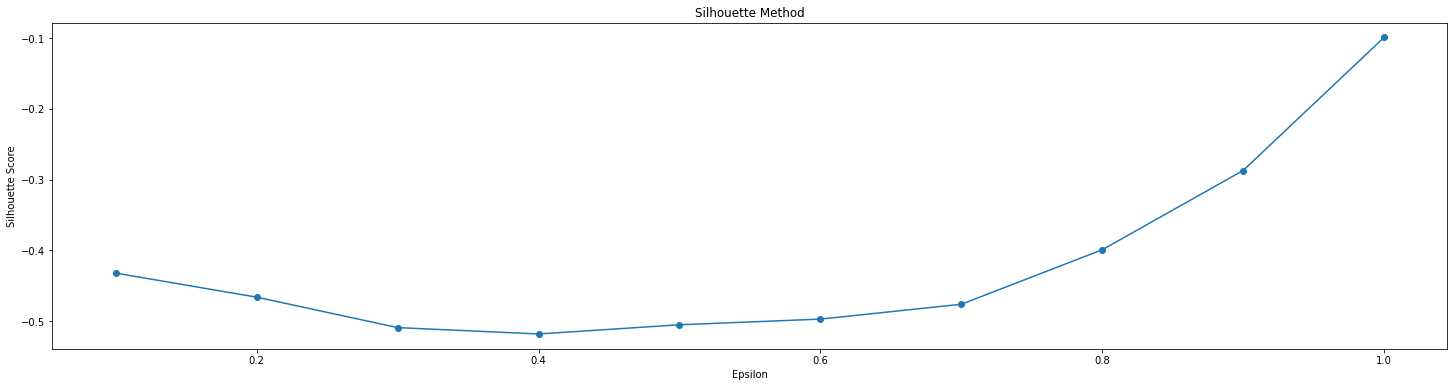

In [59]:
plt.figure(figsize=(25, 6))
plt.plot(dbscan_score['eps'], dbscan_score['Silhouette Score'], marker='o')
plt.title('Silhouette Method')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.show()

In [60]:
dbscan_score.sort_values(by='Silhouette Score', ascending=False)

,eps,Silhouette Score
9,1.0,-0.099
8,0.9,-0.287
7,0.8,-0.399
0,0.1,-0.432
1,0.2,-0.466
6,0.7,-0.476
5,0.6,-0.497
4,0.5,-0.505
2,0.3,-0.509
3,0.4,-0.518


Berdasarkan hasil pengujian dengan beberapa epsilon, didapatkan score silhouette tertinggi adalah dengan menggunakan epsilon = 1.0 yaitu **-0.099**. Maka, akan dibuat model DBSCAN dengan menggunakan **epsilon = 1.0**.

In [61]:
dbscan = DBSCAN(eps=1.0)
dbscan.fit(train)

DBSCAN(eps=1.0)

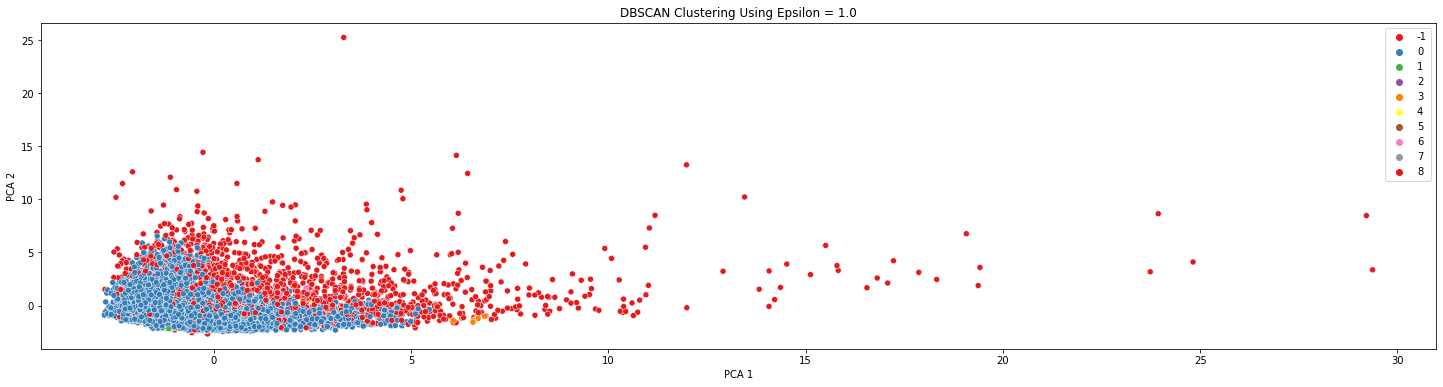

In [62]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=dbscan.labels_, data=train, palette='Set1')
plt.title('DBSCAN Clustering Using Epsilon = 1.0')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### Model Analysis

Setelah dibuat **3 model** clustering, didapatkan model Agglomerative Clustering memiliki silhouette score paling tinggi 0.368 dengan jumlah clusternya adalah 2, namun walaupun silhouette score ini kebanyakan dari data bertumpuk pada cluster 0 dan juga banyak data yang masuk ke cluster lain. Sedangkan untuk model DBSCAN mendapatkan silhouette score tertingginya pada epsilon = 1.0 yaitu **-0.099** dan menghasilkan 9 cluster, namun karena scorenya sangat rendah maka model ini tidak optimal untuk digunakan pada dataset ini.

Lalu ada model K-Means dengan score silhouette tertingginya 0.263 dengan jumlah clusternya adalah 3, model ini mampu melakukan clustering dengan cukup baik. Maka model ini yang akan digunakan untuk dilakukan uji menggunakan data inference.

## Model Testing (Data Inference)

Pada bagian ini akan dilakukan pengujian model K-Means menggunakan data testing yang sudah melalui proses scaling dan reduksi dimensi.

In [63]:
test.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,0.137833,-2.092159,1.123484,-1.000236,-0.351844,0.874653,0.030205,1.060396,0.655500
1,0.193905,-1.554312,1.267781,-0.164495,-0.241302,0.418796,-0.279329,-0.239329,0.372678
2,-1.108854,0.419294,-0.240021,0.508510,0.881738,0.442009,-0.038914,-0.142281,0.216339
3,-0.678795,3.494640,0.819232,-0.041821,0.598427,0.602537,0.299286,-0.425208,-0.101622
4,-1.019257,3.052573,0.129904,1.131501,-0.362807,0.687722,0.983888,-0.629973,0.806177


### Predictions

In [64]:
pred = kmeans.predict(test)

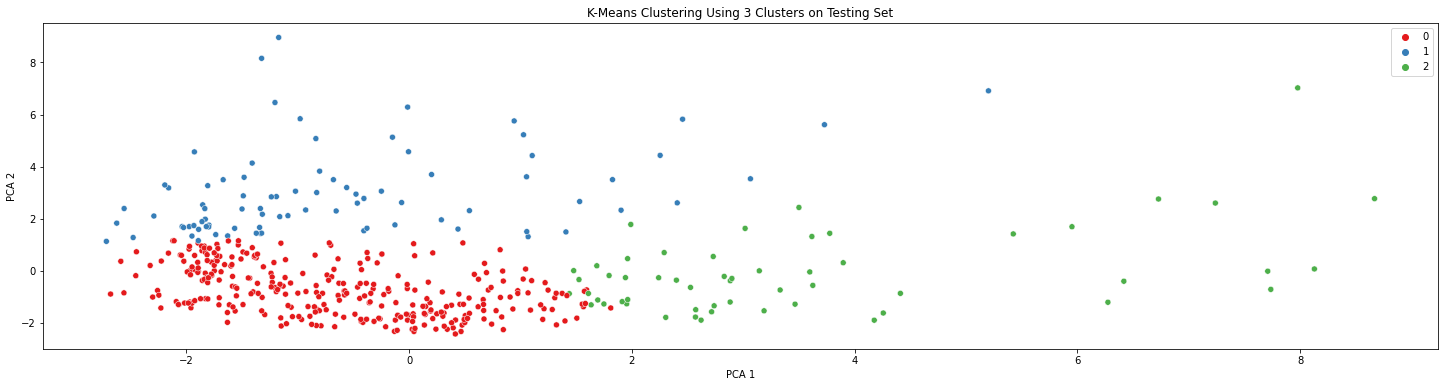

In [65]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue=pred, data=test, palette='Set1')
plt.title('K-Means Clustering Using 3 Clusters on Testing Set')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Cluster Analysis

Pada bagian ini akan dilakukan analisis terhadap setiap cluster yang dibentuk oleh model K-Means.

In [66]:
data = pd.concat([train, test])
data_pred = kmeans.predict(data)

In [67]:
cluster_cc = cc.copy()
cluster_cc['CLUSTER'] = data_pred
cluster_cc.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


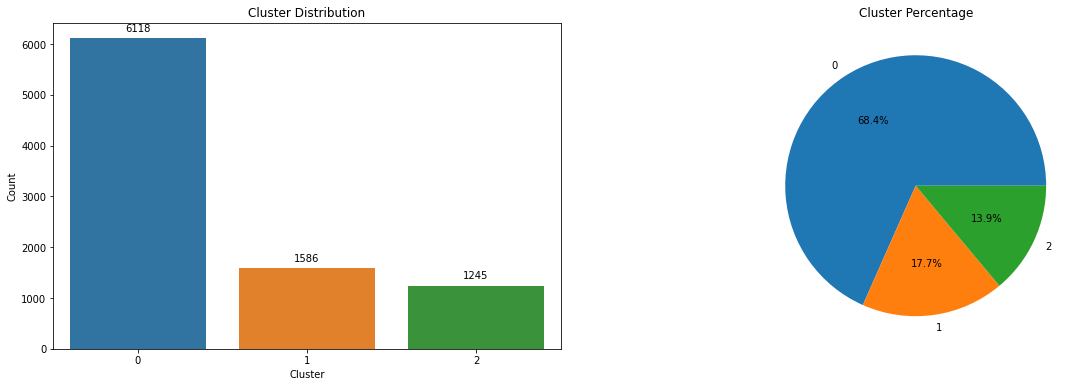

In [68]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='CLUSTER', data=cluster_cc)
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(cluster_cc['CLUSTER'].value_counts(), labels=cluster_cc['CLUSTER'].value_counts().index, autopct='%1.1f%%')
plt.title('Cluster Percentage')
plt.show()

Sekitar **68% klien** ini jatuh pada cluster 0.

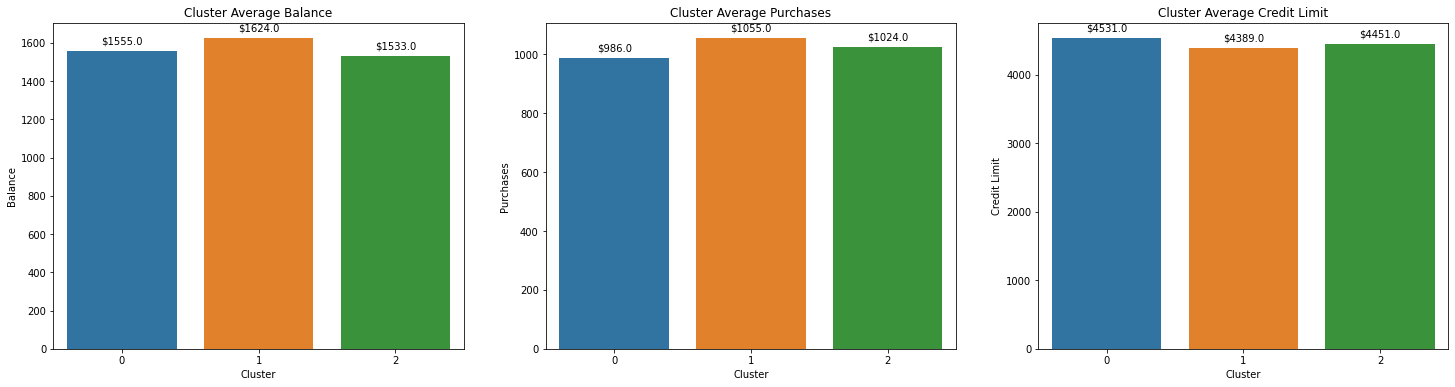

In [78]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.barplot(x='CLUSTER', y='BALANCE', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Balance')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.subplot(1, 3, 2)
fig = sns.barplot(x='CLUSTER', y='PURCHASES', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Purchases')
plt.xlabel('Cluster')
plt.ylabel('Purchases')
plt.subplot(1, 3, 3)
fig = sns.barplot(x='CLUSTER', y='CREDIT_LIMIT', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$'+ str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Cluster Average Credit Limit')
plt.xlabel('Cluster')
plt.ylabel('Credit Limit')
plt.show()

Jika dilihat dari grafik diatas, cluster 1 memiliki rata-rata jumlah saldo paling banyak diantara yang lainnya yaitu **$1,624** dengan rata-rata total pembelian juga yang paling besar yaitu **$1,055**. Namun, cluster 1 ini memiliki limit kartu kredit paling kecil antara cluster lainnya yaitu sekitar **$4,389**.

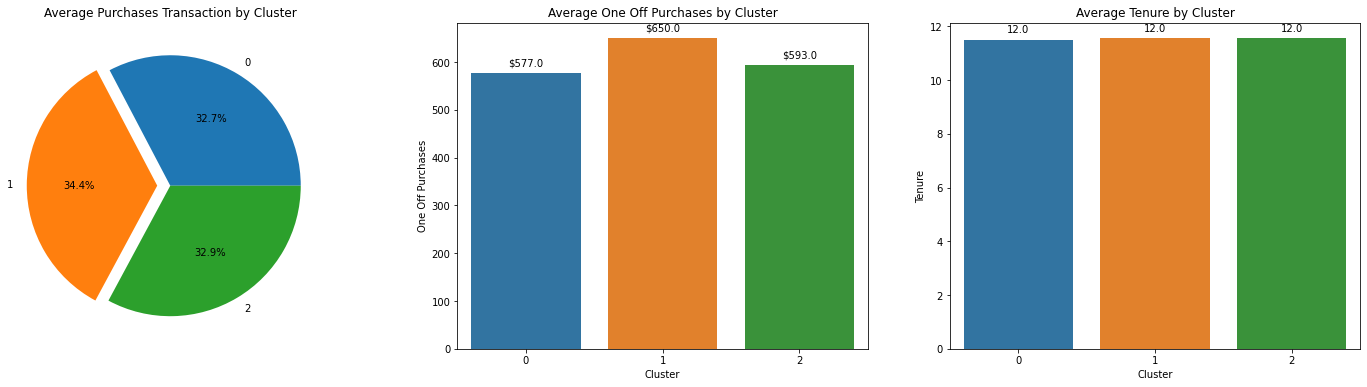

In [89]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(cluster_cc.groupby('CLUSTER').PURCHASES_TRX.mean(), labels=cluster_cc.groupby('CLUSTER').PURCHASES_TRX.mean().index, autopct='%1.1f%%', explode=[0, 0.1, 0])
plt.title('Average Purchases Transaction by Cluster')
plt.subplot(1, 3, 2)
fig = sns.barplot(x='CLUSTER', y='ONEOFF_PURCHASES', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate('$' + str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average One Off Purchases by Cluster')
plt.xlabel('Cluster')
plt.ylabel('One Off Purchases')
plt.subplot(1, 3, 3)
fig = sns.barplot(x='CLUSTER', y='TENURE', data=cluster_cc, ci=None)
for p in fig.patches:
    fig.annotate(str(round(p.get_height(), 0)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Average Tenure by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tenure')
plt.show()

Jika dilihat dari ratio rata-rata jumlah transaksinya, cluster 1 merupakan cluster yang paling sering melakukan pembelian barang dengan rata-rata pembayaran barang yang dibelinya adalah sekitar **$650**. Namun, nampaknya jangka waktu layanan kartu kredit setiap cluster itu sama yaitu **12 bulan**.